# Bienvenidos al taller de Data Science!
- En este taller se desarrollarán temas claves para entender la finalidad y utilidad de Data Science. 
- Para ello, se revisará la metodología más utilizada (CRISP-DM) a partir de un caso práctico. 
- Al finalizar el taller, el asistente será capaz de aplicar diferentes herramientas de Data Science para poder dar transformar (ya sea en modelos predicitivos o visualizaciones) y dar sentido a los datos. 

## Introducción: Metodología CRISP-DM

- La metodología CRISP-DM (CRoss Industry Standard Process for Data Mining) muestra un enfoque estructurado para la planificación y ejecución de proyectos de Data Mining, Business Analytics y Data Science. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/1280px-CRISP-DM_Process_Diagram.png" width="400" height="400">

- Según la encuesta publicada por KDnuggets (site que cubre los campos de Business Analytics, Data Mining y Data Science a través de entrevistas con líderes en el tema), la metodología CRISP-DM es la más utilizada en proyectos de Data Science).

<img src="https://78.media.tumblr.com/774ecde5f223970b03bedc3a68eb0fae/tumblr_inline_nv1porp78R1rmpjcz_500.png" width="500" height="500">

# Caso: ¿Quién sobrevive al Titanic?

## Business Understanding

- El hundimiento del Titanic es uno de los accidentes náuticos más conocidos de la historia. 
- Luego de impactar contra un iceberg, el Titanic se hundío y con ello 1502 personas de los 2224 pasajeros fallecieron. 
- Una de las principales causas de tan alarmentes cifras es que no exisitían botes salvavidas suficientes para los pasajeros y la tripulación.
- Si bien existe cierto elemento de fortuna en la supervivencia de los pasajeros, existen ciertos grupos de personas que tenían mayor probabilidad de salvarse (ej: mujeres, niñas, niños y la clase alta).
- En este caso, se busca determinar qué tipo de personas tenían mayor probabilidad de sobrevivir.

## Data understanding

Para poder trabajar con los datos y realizar las diferentes tareas propuestas, se deben importar ciertas librerías que dan las capacidades necesarias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import requests
from ipywidgets import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle 
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/jdmorzan/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Leer los datos a partir de un archivo CSV(Comma Separated Values). Existen otros tipos de archivo.

In [2]:
datos = pd.read_csv('train.csv', dtype={"Age": np.float64})

Mostrar el número de registros (filas) y variables (columnas) que tienen nuestros datos.

In [3]:
print ("El archivo tiene {} registros y {} variables.".format(datos.shape[0], datos.shape[1]))

El archivo tiene 891 registros y 12 variables.


Mostrar las 5 (por default) primeras filas de los datos. En caso queramos ver más filas se puede especificar.

In [4]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mostrar las 5 (por default) últimas filas de los datos. En caso queramos ver más filas se puede especificar.

In [5]:
datos.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Calcular estadísticos descriptivos de los datos. El .T es para fines de visualización.

In [6]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Mostrar el tipo de datos de las variables

In [7]:
datos.dtypes.reset_index()

,index,0
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


Mostrar las columnas con datos faltantes y el porcentaje de los mismos

In [8]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns [mis_val_table_ren_columns['Missing Values'] != 0].sort_values('Missing Values', ascending=False)

missing_values_table(datos)

,Missing Values,% of Total Values
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Graficar dos plots:
- Violinplot: Estimación de la función de densidad.
- Swarmplot: Muestra cómo se colocan los puntos en la función de densidad.

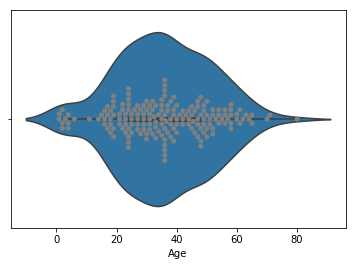

In [9]:
sns.violinplot(x= "Age", data = datos.dropna())
sns.swarmplot(x="Age", data=datos.dropna(), color = "grey")

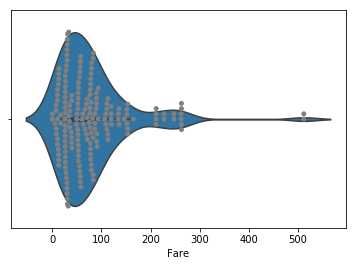

In [10]:
sns.violinplot(x= "Fare", data = datos.dropna())
sns.swarmplot(x="Fare", data=datos.dropna(), color = "grey")

Gráficos de barra para variables categóricas, tomando como criterio adicional una clase.

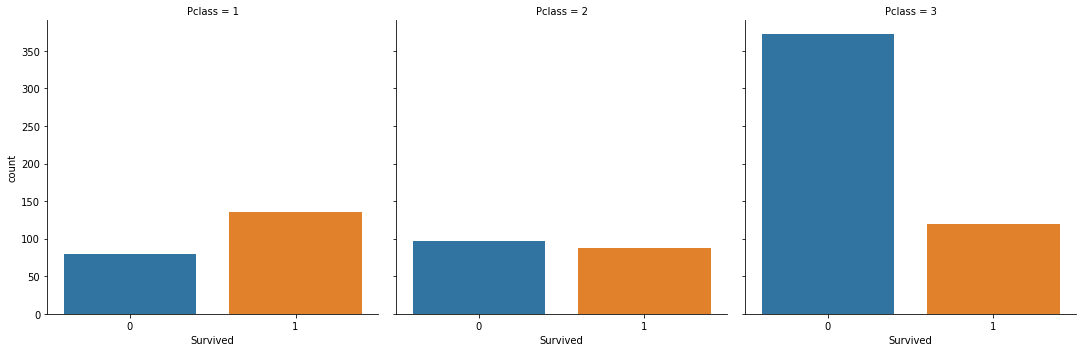

In [11]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=datos);

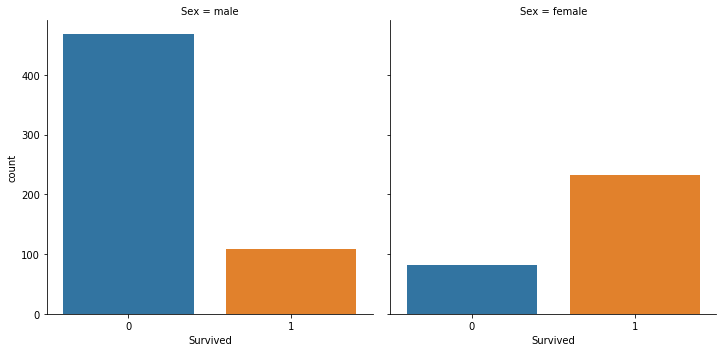

In [12]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=datos);

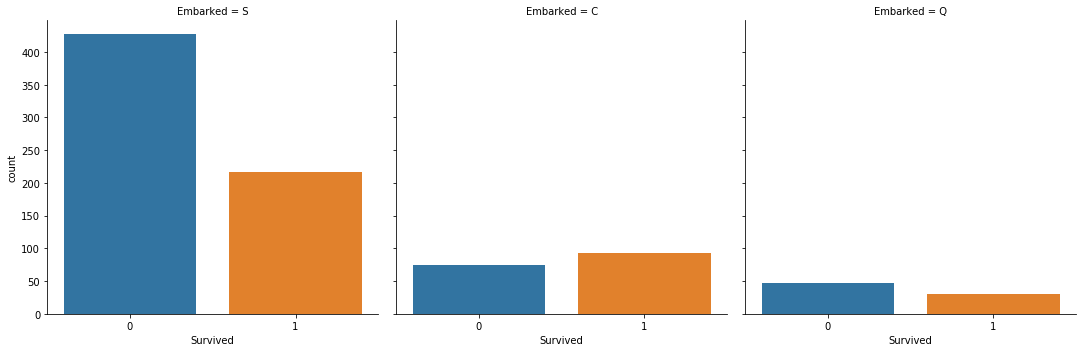

In [13]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=datos);

Graficar distribucion de datos numéricos.

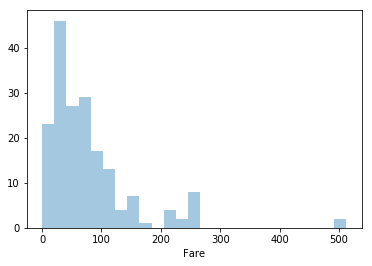

In [14]:
sns.distplot(datos.dropna().Fare, kde=False);

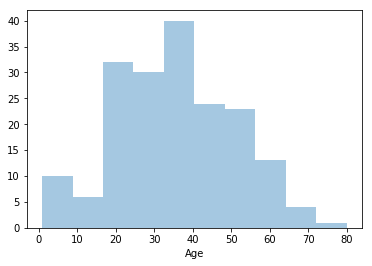

In [15]:
sns.distplot(datos.dropna().Age, kde=False);

Mostrar gráficos de dispersión o de barra de variable contra variable.

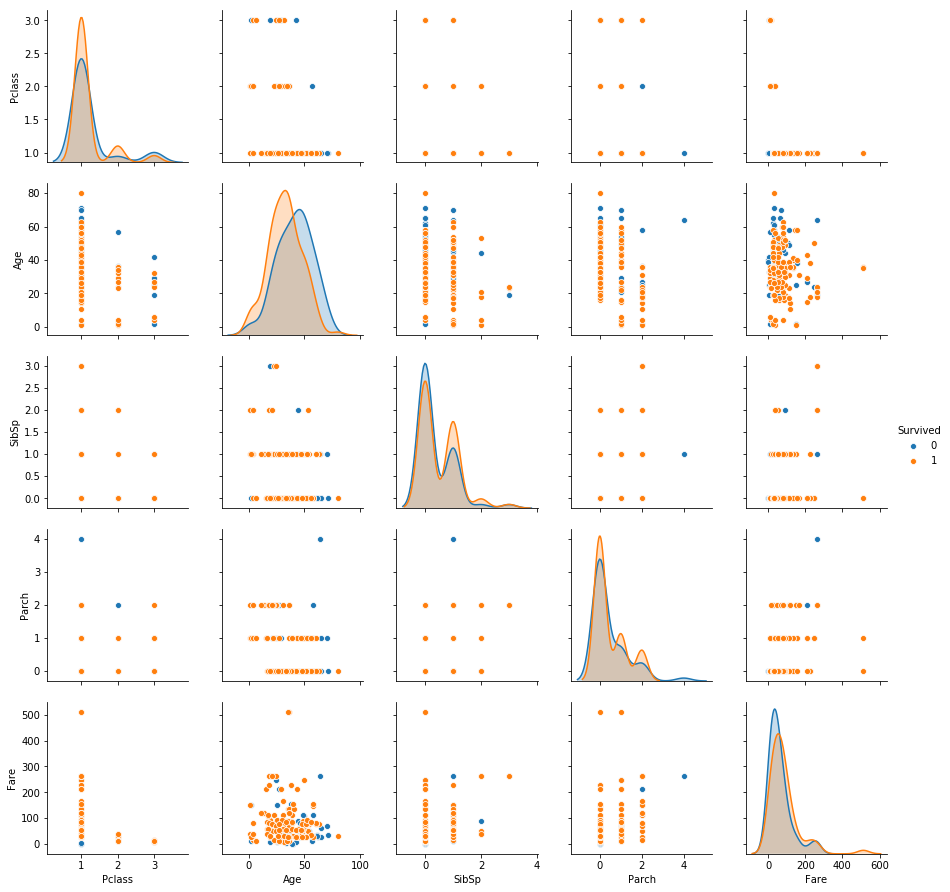

In [16]:
sns.pairplot(datos.dropna(), vars=["Pclass", "Age", "SibSp", "Parch", "Fare"], hue='Survived')

Mostrar la correlación existente entre los datos.

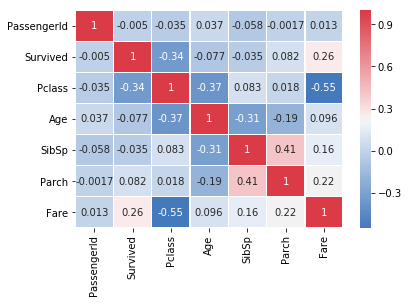

In [17]:
corr = datos.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5, cmap = sns.diverging_palette(250, 10, as_cmap=True))

## Data preparation

Combinar dos variables para crear una nueva (Feature Engineering).

In [18]:
datos["f_size"] = datos["SibSp"] + datos ["Parch"]

Eliminar variables que no sirven para predecir

In [19]:
del datos["Cabin"] #NA
del datos["PassengerId"] #N
del datos["Name"] #N
del datos["SibSp"] #C
del datos["Parch"] #C
del datos["Ticket"] #N

Rellenar datos faltantes.

In [20]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [21]:
datos["Embarked"] = datos["Embarked"].fillna(datos["Embarked"].mode())

Eliminar datos faltantes

In [22]:
datos = datos.dropna()

Mostrar las nuevas dimensiones de los datos.

In [23]:
print ("El archivo tiene {first} registros y {second} variables.".format(first = datos.shape[0], second = datos.shape[1]))

El archivo tiene 889 registros y 7 variables.


Eliminar posibles outliers

In [24]:
# datos = datos[datos["Age"] < 100]

In [25]:
datos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,f_size
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


Convertir variables categóricas a variables discretas.

In [26]:
le1 = preprocessing.LabelEncoder()
datos["Sex"] = le1.fit_transform(datos["Sex"])
le2 = preprocessing.LabelEncoder()
datos["Embarked"] = le2.fit_transform(datos["Embarked"])

Mostrar la relación entre los valores originales y codificados.

In [27]:
pd.DataFrame({"Valor original":le1.classes_ , "Valor codificado": [i for i in range(len(le1.classes_))]})

,Valor original,Valor codificado
0,female,0
1,male,1


In [28]:
pd.DataFrame({"Valor original":le2.classes_ , "Valor codificado": [i for i in range(len(le2.classes_))]})

,Valor original,Valor codificado
0,C,0
1,Q,1
2,S,2


In [29]:
datos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,f_size
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


Normalizar las variables.

In [30]:
ascaler = MinMaxScaler()
ascaler.fit(np.asanyarray(datos["Age"]).reshape(-1, 1))
datos["Age"] = ascaler.transform(np.asanyarray(datos["Age"]).reshape(-1, 1))
fscaler = MinMaxScaler()
fscaler.fit(np.asanyarray(datos["Fare"]).reshape(-1, 1))
datos["Fare"] = fscaler.transform(np.asanyarray(datos["Fare"]).reshape(-1, 1))

In [31]:
datos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,f_size
0,0,3,1,0.271174,0.014151,2,1
1,1,1,0,0.472229,0.139136,0,1
2,1,3,0,0.321438,0.015469,2,0
3,1,1,0,0.434531,0.103644,2,1
4,0,3,1,0.434531,0.015713,2,0


Exportar datos limpios

In [32]:
datos.to_excel('data_clean.xlsx')

Mostrar (nuevamente) el gráfico de correlación.

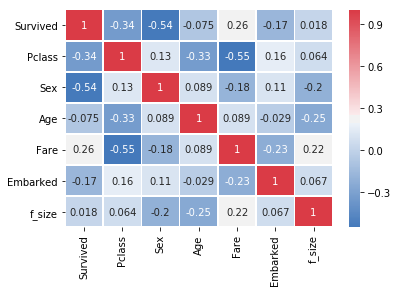

In [33]:
corr = datos.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5, cmap = sns.diverging_palette(250, 10, as_cmap=True))

## Modeling y Evaluation - ¿Cuál es mi problema? ¿Cuál es mi objetivo?

- Aprendizaje supervisado: existe una hipótesis a priori. Tengo clases que quiero predecir y un "profesor" que las enseña.
    - Clasificación: predecir a qué clase corresponde una observación).
    - Regresión: predecir un valor númerico.
- Aprendizaje no supervisado: no existe una hipótesis a priori. Exploratorio. 
    - Clustering: los datos se agrupan entre sí a partir de semejanzas y diferencias.

<img src="https://cdn-images-1.medium.com/max/1600/1*AZMDyaifxGVdwTV-1BN7kA.png" width="600" height="600">

Separar en vectores de características (feature vectors) y labels (clases).

In [34]:
X = datos.drop("Survived", axis = 1).values
y = datos["Survived"].values

Separar datos en entrenamiento y testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Importar diferentes modelos predictivos

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

Definir función para graficar matriz de confusión

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

import seaborn as sns

def plot_confusion_matrix(cm, 
                          normalize=False,
                          title='Confusion matrix',
                          #cmap=sns.diverging_palette(220,10,as_cmap=True)):
                          cmap = 'Blues'):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2) #IMPORTANTE
    plt.xticks(tick_marks, [0,1], rotation=45) #IMPORTANTE
    plt.yticks(tick_marks , [0,1]) #IMPORTANTE

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#### Técnias supervisadas

Construir clasificador

In [38]:
clf = RandomForestClassifier()

Entrenar clasificador

In [39]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predecir con el modelo entrenado

In [40]:
y_predicted = clf.predict(X_test)

Mostrar los resultados de clasificación (precision, recall, fmeasure)

In [41]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       101
           1       0.78      0.70      0.74        77

   micro avg       0.79      0.79      0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.78       178



Mostrar matriz de confusión.

Confusion matrix, without normalization
[[86 23]
 [15 54]]


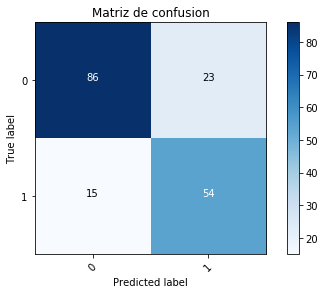

In [42]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

Lo misma idea se sigue para los demás clasificadores. 

In [43]:
clf = MLPClassifier(solver = "adam")

In [44]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
y_predicted = clf.predict(X_test)

In [46]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       106
           1       0.80      0.76      0.78        72

   micro avg       0.83      0.83      0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



Confusion matrix, without normalization
[[92 17]
 [14 55]]


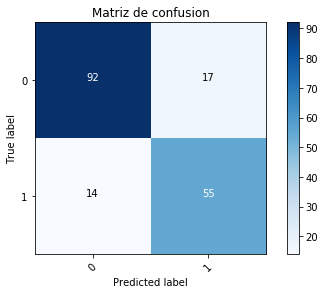

In [47]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [48]:
clf = DecisionTreeClassifier()

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_predicted = clf.predict(X_test)

In [51]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        99
           1       0.75      0.66      0.70        79

   micro avg       0.75      0.75      0.75       178
   macro avg       0.75      0.74      0.75       178
weighted avg       0.75      0.75      0.75       178



Confusion matrix, without normalization
[[82 27]
 [17 52]]


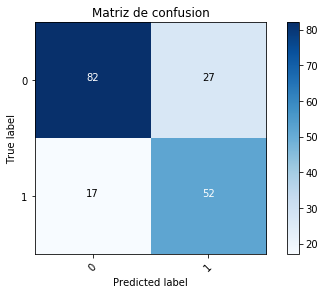

In [52]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [53]:
clf = LogisticRegression()

In [54]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_predicted = clf.predict(X_test)

In [56]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.75      0.71      0.73        73

   micro avg       0.79      0.79      0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



Confusion matrix, without normalization
[[88 21]
 [17 52]]


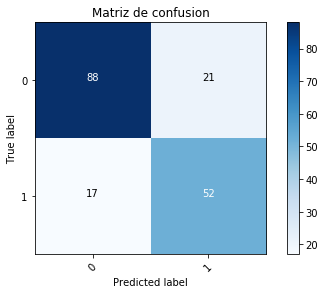

In [57]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [58]:
clf = KNeighborsClassifier()

In [59]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
y_predicted = clf.predict(X_test)

In [61]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.75      0.71      0.73        73

   micro avg       0.79      0.79      0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



Confusion matrix, without normalization
[[88 21]
 [17 52]]


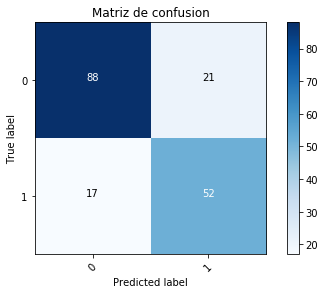

In [62]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [63]:
clf = svm.SVC()

In [64]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
y_predicted = clf.predict(X_test)

In [66]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       111
           1       0.72      0.75      0.74        67

   micro avg       0.80      0.80      0.80       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



Confusion matrix, without normalization
[[92 17]
 [19 50]]


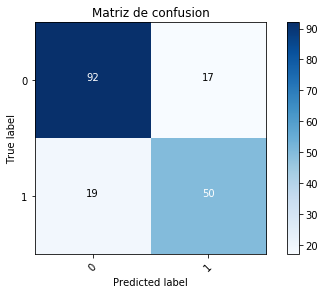

In [67]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [68]:
clf = BernoulliNB()

In [69]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
y_predicted = clf.predict(X_test)

In [71]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        73

   micro avg       0.80      0.80      0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



Confusion matrix, without normalization
[[89 20]
 [16 53]]


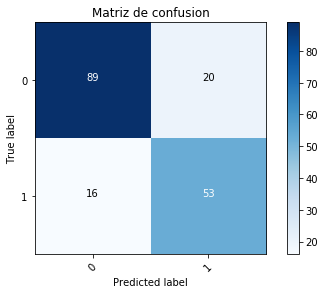

In [72]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [73]:
clf = GradientBoostingClassifier()

In [74]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
y_predicted = clf.predict(X_test)

In [76]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

   micro avg       0.80      0.80      0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



Confusion matrix, without normalization
[[92 17]
 [18 51]]


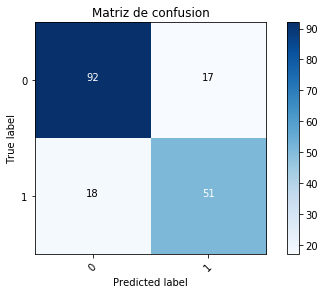

In [77]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, normalize=False,
                      title='Matriz de confusion')

In [108]:
clf.feature_importances_

array([0.13, 0.44, 0.13, 0.17, 0.02, 0.1 ])

#### Probar técnica no supervisada

Importar técnica de clustering.

In [78]:
from sklearn.cluster import KMeans

Inicializar técnica de clustering, entrenar el modelo y obtener las etiquetas.

In [79]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

Asignar las etiquetas correspondientes a los datos.

In [80]:
datos["clusters"] = labels

In [81]:
datos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,f_size,clusters
0,0,3,1,0.271174,0.014151,2,1,0
1,1,1,0,0.472229,0.139136,0,1,0
2,1,3,0,0.321438,0.015469,2,0,0
3,1,1,0,0.434531,0.103644,2,1,0
4,0,3,1,0.434531,0.015713,2,0,0


Mostrar estadísticos por cluster.

In [82]:
datos[datos["clusters"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,798.0,0.387218,0.487420,0.0,0.000000,0.000000,1.000000,1.0
Pclass,798.0,2.284461,0.841540,1.0,1.000000,3.000000,3.000000,3.0
Sex,798.0,0.674185,0.468972,0.0,0.000000,1.000000,1.000000,1.0
Age,798.0,0.381660,0.153854,0.0,0.296306,0.367921,0.443956,1.0
Fare,798.0,0.057061,0.092138,0.0,0.015412,0.025374,0.051822,1.0
Embarked,798.0,1.511278,0.805719,0.0,1.000000,2.000000,2.000000,2.0
f_size,798.0,0.457393,0.710251,0.0,0.000000,0.000000,1.000000,2.0
clusters,798.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [83]:
datos[datos["clusters"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,91.0,0.340659,0.476557,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,91.0,2.549451,0.734298,1.000000,2.000000,3.000000,3.000000,3.000000
Sex,91.0,0.428571,0.497613,0.000000,0.000000,0.000000,1.000000,1.000000
Age,91.0,0.241831,0.186152,0.004147,0.063835,0.233476,0.367921,0.798944
Fare,91.0,0.111643,0.122304,0.015469,0.053432,0.061264,0.091543,0.513342
Embarked,91.0,1.747253,0.625272,0.000000,2.000000,2.000000,2.000000,2.000000
f_size,91.0,4.846154,1.943211,3.000000,3.000000,5.000000,6.000000,10.000000
clusters,91.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Revertir transformaciones para mayor interpretabilidad.

In [84]:
datos["Age"] = ascaler.inverse_transform(np.asanyarray(datos["Age"]).reshape(1, -1))[0]
datos["Fare"] = fscaler.inverse_transform(np.asanyarray(datos["Fare"]).reshape(1, -1))[0]

In [85]:
datos["Sex"] = le1.inverse_transform(datos["Sex"])
datos["Embarked"] = le2.inverse_transform(datos["Embarked"])

In [86]:
datos[datos["clusters"] == 0].describe(include = "all").T.fillna("-")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,798.0,-,-,-,0.387218,0.48742,0,0,0,1,1
Pclass,798.0,-,-,-,2.28446,0.84154,1,1,3,3,3
Sex,798.0,2,male,538,-,-,-,-,-,-,-
Age,798.0,-,-,-,30.7925,12.2437,0.42,24,29.6991,35.75,80
Fare,798.0,-,-,-,29.2342,47.2052,0,7.8958,13,26.55,512.329
Embarked,798.0,3,S,567,-,-,-,-,-,-,-
f_size,798.0,-,-,-,0.457393,0.710251,0,0,0,1,2
clusters,798.0,-,-,-,0,0,0,0,0,0,0


In [87]:
datos[datos["clusters"] == 1].describe(include = "all").T.fillna("-")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,91.0,-,-,-,0.340659,0.476557,0,0,0,1,1
Pclass,91.0,-,-,-,2.54945,0.734298,1,2,3,3,3
Sex,91.0,2,female,52,-,-,-,-,-,-,-
Age,91.0,-,-,-,19.6649,14.814,0.75,5.5,19,29.6991,64
Fare,91.0,-,-,-,57.1982,62.6597,7.925,27.375,31.3875,46.9,263
Embarked,91.0,3,S,77,-,-,-,-,-,-,-
f_size,91.0,-,-,-,4.84615,1.94321,3,3,5,6,10
clusters,91.0,-,-,-,1,0,1,1,1,1,1


Mostrar los gráficos de dispersión y de barras de variable contra variable.

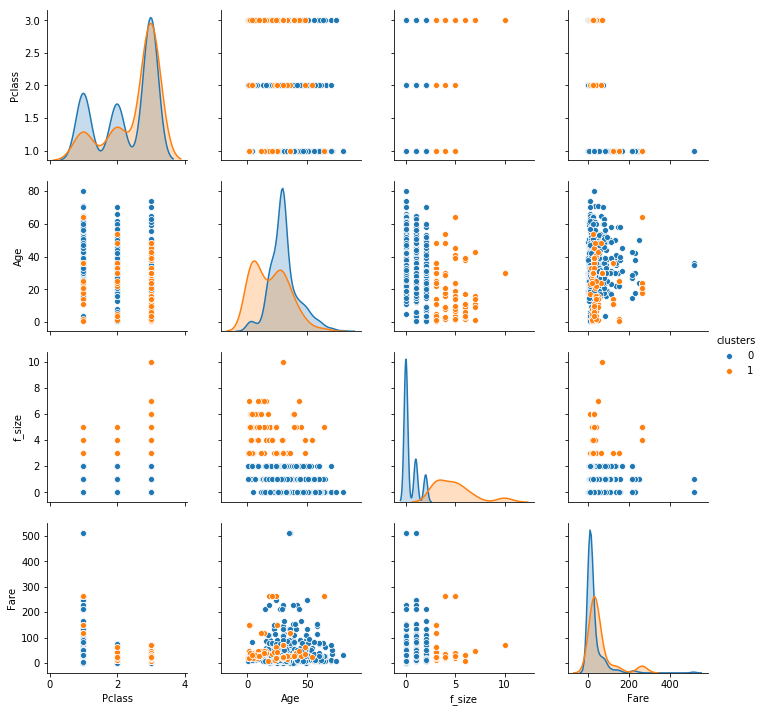

In [88]:
sns.pairplot(datos.dropna(), vars=["Pclass", "Age", "f_size", "Fare"], hue='clusters')

## Deployment

In [89]:
datos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,f_size,clusters
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,0
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,0
4,0,3,male,35.0,8.0500,S,0,0


Definir variables para probar el clasificador.

In [90]:
Pclass = 3
Sex = 0
Age = ascaler.transform(np.asanyarray(30).reshape(1,-1))[0][0]
Fare = fscaler.transform(np.asanyarray(60).reshape(1,-1))[0][0]
Embarked = 2
f_size = 2
prueba = [Pclass, Sex, Age, Fare, Embarked, f_size]

Mostrar la predicción.

In [91]:
prediction = clf.predict(np.asanyarray(prueba).reshape(1, -1))[0]
if prediction == 0:
    print ("No sobrevivio :(")
else:
    print ("Sobrevivio!")

No sobrevivio :(


Predecir para nuevos datos.

In [92]:
datosxpred = pd.read_csv("test.csv")

In [93]:
datosxpred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
datosxpred["f_size"] = datosxpred["SibSp"] + datosxpred["Parch"]

In [95]:
del datosxpred["Cabin"] #NA
del datosxpred["PassengerId"]
del datosxpred["Name"]
del datosxpred["SibSp"]
del datosxpred["Parch"]
del datosxpred["Ticket"]

In [96]:
datosxpred["Age"] = datosxpred["Age"].fillna(datosxpred["Age"].mean())

In [97]:
datosxpred["Embarked"] = datosxpred["Embarked"].fillna(datosxpred["Embarked"].mode())

In [98]:
datosxpred = datosxpred.dropna()

In [99]:
le1 = preprocessing.LabelEncoder()
datosxpred["Sex"] = le1.fit_transform(datosxpred["Sex"])
le2 = preprocessing.LabelEncoder()
datosxpred["Embarked"] = le2.fit_transform(datosxpred["Embarked"])

In [100]:
ascaler = MinMaxScaler()
ascaler.fit(np.asanyarray(datosxpred["Age"]).reshape(-1, 1))
datosxpred["Age"] = ascaler.transform(np.asanyarray(datosxpred["Age"]).reshape(-1, 1))
fscaler = MinMaxScaler()
fscaler.fit(np.asanyarray(datosxpred["Fare"]).reshape(-1, 1))
datosxpred["Fare"] = fscaler.transform(np.asanyarray(datosxpred["Fare"]).reshape(-1, 1))

Añadir nueva variable de predicción.

In [101]:
probs = clf.predict_proba(datosxpred)

In [102]:
probs = pd.DataFrame(probs, columns= ["Prob. No sobrevivir", "Prob. Sobrevivir"])

In [103]:
datosxpred["Survived"] = clf.predict(datosxpred)

In [104]:
datosxpred = pd.concat([datosxpred, probs], axis = 1)

Exportar datos.

In [105]:
datosxpred.to_excel("data_predicted.xlsx")